# Download Market Data
This notebook shows how to download data from the Alpha Vantage website.

In [1]:
# Small support module containing my Alpha Vantage API token.
# This prevents me from accidentally uploading it to GitHub :P
import av_cred

# Alpha Vantage module
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

In [5]:
# Load the daily market data for a sample of indexes
symbols=['DJI',  # Dow Jones Industrial Average
         'SPX']  # S&P 500

ts = TimeSeries(av_cred.token, output_format='pandas')

# Loop over all symbols
markets = None
for sym in symbols:
    # Get the results from the requested symbol
    dat = ts.get_daily_adjusted(symbol=sym, outputsize='full')
    dat_df = pd.DataFrame(dat[0])

    # If this is the first symbol make sure to 
    if markets is None:
        markets = dat_df[['4. close']]
        markets = markets.rename(columns={'4. close':sym})
    else:
        markets[sym] = dat_df['4. close']

print(markets.head())
print(markets.tail())

DJI        SPX
date                             
2020-04-08  23433.5703  2749.9800
2020-04-07  22653.8594  2659.4099
2020-04-06  22679.9902  2663.6799
2020-04-03  21052.5293  2488.6499
2020-04-02  21413.4395  2526.8999
                   DJI      SPX
date                           
2000-01-07  11522.5596  1441.47
2000-01-06  11253.2598  1403.45
2000-01-05  11122.6504  1402.11
2000-01-04  10997.9297  1399.42
2000-01-03  11357.5098  1455.22


In [6]:
markets.dtypes

DJI    float64
SPX    float64
dtype: object

In [7]:
markets.describe()

,DJI,SPX
count,5099.000000,5099.000000
mean,14202.261035,1594.213521
std,5362.036109,606.404733
min,6547.049800,676.530000
25%,10427.189950,1155.255000
50%,12169.879900,1366.939900
75%,17214.640600,2012.775000
max,29551.419900,3386.149900


In [8]:
# Scale the data
mrkt_scaled = markets.copy()

# Import a data scaler object
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

for col in mrkt_scaled.columns:
    # Scale this column
    col_data = mrkt_scaled[col].values
    mrkt_scaled[col] = scaler.fit_transform(col_data.reshape(-1,1))

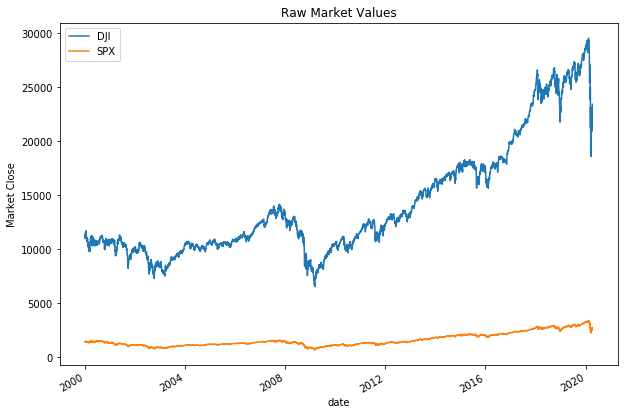

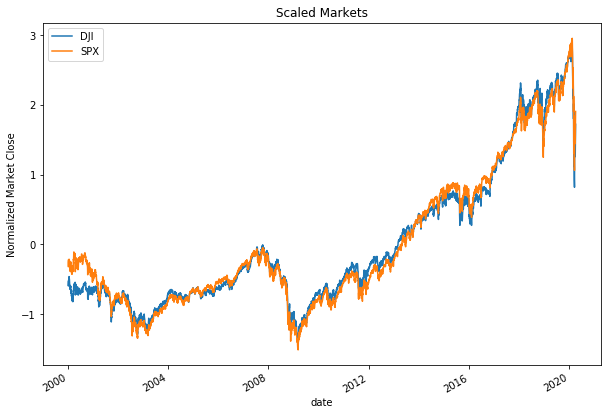

In [9]:
import matplotlib.pyplot as plt
markets.plot(title='Raw Market Values', figsize=(10,7))
plt.ylabel('Market Close');
mrkt_scaled.plot(title='Scaled Markets', figsize=(10,7))
plt.ylabel('Normalized Market Close');

In [7]:
markets.to_pickle('../data/markets.pkl')